# Análisis básico de datos con Pandas

Las principales estructuras de datos en Pandas son las Series y los DataFrame. Las Series son matrices unidimensionales con un índice. Los Data Frames son estructuras de datos bidimensionales, tablas, donde cada columna contiene datos del mismo tipo. Los DataFrames sirven para representar datos reales: las filas corresponden a instancias (ejemplos, observaciones, etc.), y las columnas corresponden a las características de cada una de estas instancias.

## Carga, lectura y primera exploración del Data Frame

Vamos a ver los distintos métodos de Pandas analizando un conjunto de datos sobre la tasa de rebote (churn rate= de clientes de operadores de telecomunicaciones. El churn rate es la tasa de clientes que se dan de baja (ya sea de una lista de suscripción o de cualquier otro tipo de base de datos).

Primero importamos las bibliotecas necesarias, leemos los datos (usando read_csv) y echamos un vistazo a las primeras 5 filas usando el método head():

In [2]:
# primero, importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
# si quieres quitar los warnings puedes utilizar:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Echamos un ojo a las dimensiones de nuestro Data Frame, los nombres de las columnas y los tipos de datos que hay en ellas.

In [4]:
df.shape

(3333, 21)

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

bool, int64, float64 y object son los tipos de datos de nuestras funciones. Vemos que una feature es de tipo booleano (bool), 3 features son de tipo object y 16 son de tipo numérico. Con este mismo método, podemos ver fácilmente si hay algún valor faltante. Aquí, no hay ninguno porque cada columna contiene 3333 observaciones, el mismo número de filas que vimos antes con shape().

Podemos cambiar el tipo de columna con el método astype. Apliquemos este método a la columna Churn para convertirlo en int64, cambiando los valores False por 0 y los True por 1:

In [10]:
df['churn'] = df['churn'].astype('int64')
df['churn'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
Name: churn, dtype: int64

El método describe muestra los descriptivos básicos de cada columna numérica (tipos int64 y float64): número de valores (que no son NaN), media, desviación estándar, rango, mediana, y los cuartiles 1 y 3 (0.25 y 0.75).

In [11]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Si queremos ver estadísticos de las columnas no numéricas podemos utilizar el parámetro include en el método describe.

In [12]:
df.describe(include = ['object', 'bool'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,333-8180,no,no
freq,106,1,3010,2411


In [22]:
df[df['state'] == 'WV'].count()[0]

106

Vemos que tenemos 3333 valores en todas las columnas no númericas, en unique vemos el número de valores únicos para cada columna, en top vemos el valor que más se repite y en freq su frecuencia

Si queremos ver el número de clientes leales podemos aplicar el método value_counts sobre la columna Churn. Los 0 serán los False, por lo tanto los clientes que no han abandonado el servicio

In [23]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

Vemos que de 3333, 2850 son files y 483 han abandonado el servicio. Podemos ver los ratios utilizando el parámetro normalize de la función value_counts

In [24]:
df['churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [31]:
import matplotlib.pyplot as plt

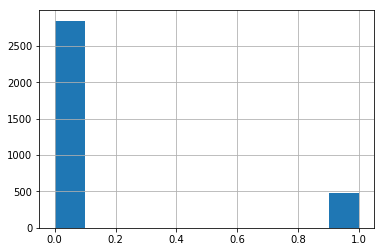

In [35]:
df['churn'].hist();

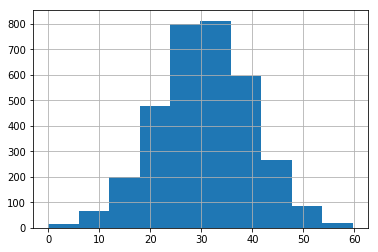

In [36]:
df['total day charge'].hist();

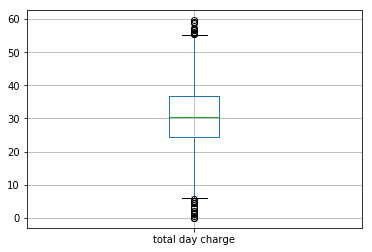

In [46]:
d = df[['total day charge']]
d.boxplot();

In [47]:
type(d)

pandas.core.frame.DataFrame

In [49]:
d.head()

,total day charge
0,45.07
1,27.47
2,41.38
3,50.90
4,28.34


## Clasificación de los datos

Podemos ordenar el Data Frame por los valores de sus columnas. Por ejemplo, vamos a ordenar el Data Frame de mayor a menor según el gasto que hacen en un día los/as usuarios/as (columna: total day charge).

In [27]:
df.sort_values(by='total day charge', ascending=False).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


También podemos utilizar este método para varias columnas. Si queremos ver los/as usuarios/as que más pagan en un día y son fieles al servicio:

In [29]:
df.sort_values(by=['churn', 'total day charge'],
        ascending=[True, False]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


## Selección de datos

Hay muchas formas de seleccionar datos para hacer cáculos sobre subconjuntos del Data Frame. Podemos seleccionar una columna completa para que nos saque sus valores o para aplicar funciones sobre ella. Vamos a ver la proporción de gente que ha abandonado el servicio:

In [55]:
df['churn'].mean()

0.14491449144914492

In [54]:
len(df[df['churn'] == 1])/len(df)

0.14491449144914492

Una tasa de rebote del 14.5% puede ser un problema grave para la empresa

También podemos seleccionar datos que cumplen condiciones, como hemos visto en la celda anterior (utilizando la función query o con corchetes). Ahora vamos a utilizar este método para ver los valores medios de las columnas de aquellos usuarios que no son fieles al servicio:

In [72]:
df.query('churn == 1')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,1
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
57,CO,121,408,370-7574,no,yes,30,198.4,129,33.73,...,77,6.40,181.2,77,8.15,5.8,3,1.57,3,1
69,TX,150,510,374-8042,no,no,0,178.9,101,30.41,...,110,14.37,148.6,100,6.69,13.8,3,3.73,4,1
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,1


In [57]:
df[df['churn'] == 1].mean()

account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64

¿Cuánto tiempo al día de media pasan al teléfono los usuarios que han abandonado el servicio?

In [58]:
df[df['churn'] == 1]['total day minutes'].mean()

206.91407867494814

¿Cuál es la duración máxima de las llamadas internacionales de aquellos usuarios leales que no tienen un plan internacional?

In [60]:
df[(df['churn'] == 0) & (df['international plan'] == 'no')]['total intl minutes'].max()

18.9

Esto podría darnos una idea a la hora de generar nuevas tarifas para fidelización o para llevar a estos usuarios al plan internacional

Recordemos que para selección de datos podemos utilizar la función .loc que selecciona por nombre o .iloc que selecciona por posición. Imaginemos que solo queremos ver los valores de las 3 primeras columnas de los 5 primeros casos de nuestro Data Frame

In [65]:
# state es la primera columna y area code la tercera. Seleccionamos por nombre
# Nos incluye el valor máximo (5) porque estamos llamando por etiquetas y no por posición
df.loc[0:5, 'state':'area code']

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [66]:
# No nos incluye la 6ª fila (índice/posición 5) porque estamos llamando por posición. 
# Sí incluye la 3ª columna porque corresponde al índice/posición 2 (incluida en 0:3). Cosas de la sintaxis de python.
df.iloc[0:5, 0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Si queremos que nos saque la última o la primera fila del dataframe podemos usar los métodos de head() o tail(). Pero también podemos utilizar el índice:

In [70]:
# Le pedimos que nos saque desde la última fila (-1) hasta el final, vamos, solo la última.
df[-1:]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


In [71]:
# Le pedimos desde el principio hasta la primera fila, es decir, solo la primera.
df[:1]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


## Funciones

Podemos utilizar apply para aplicar una función a cada fila. Imaginemos que, por lo que sea, queremos que los nombres de los estados de donde provienen los/as usuarios/as están registrados en minúscula:

In [97]:
df['state'].apply(lambda x: x.lower()).head()

0    ks
1    oh
2    nj
3    oh
4    ok
Name: state, dtype: object

O queremos ver, por lo que sea, el porcentaje de tiempo que se tira la gente hablando por teléfono al día. En un día hay 1440 minutos

In [95]:
def daypercminutes (number_of_minutes):
    return (number_of_minutes/ 1440)*100

In [96]:
df['total day minutes'].apply(lambda x: daypercminutes(x)).head()

0    18.409722
1    11.222222
2    16.902778
3    20.791667
4    11.576389
Name: total day minutes, dtype: float64

También podemos utilizar el método map que aplica una función sobre todos los elementos y como resultado se devuelve un iterable de tipo map:

In [104]:
list(map(daypercminutes, df['total day minutes']))[0:5]

[18.409722222222225,
 11.222222222222221,
 16.90277777777778,
 20.791666666666664,
 11.576388888888888]

Con la función replace podemos reemplazar valores. Imaginemos que queremos que la columna voice mail plan nos devuelva booleanos en vez de 'yes' o 'no'.

In [100]:
df['voice mail plan'].replace({'yes' : True, 'no' : False}).head()

0     True
1     True
2    False
3    False
4    False
Name: voice mail plan, dtype: bool

De la misma manera, podemos pasarle un map

In [101]:
df['international plan'].map({'yes' : True, 'no' : False}).head()

0    False
1    False
2    False
3     True
4     True
Name: international plan, dtype: bool

Podemos jugar con las estructuras de dict si queremos reemplazar los valores de varias columnas o si simplemente queremos que nos devuelva una estructura de dataframe.

In [107]:
new_values = {'yes' : True, 'no' : False}
df.replace({'voice mail plan' : new_values, 'international plan' : new_values}).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Agrupación

Podemos agrupar datos en función de una columna utilizando el método groupby. Por ejemplo, imaginemos que queremos que nos muestre los descriptivos de las columnas 'total day minutes', 'total eve minutes' y 'total night minutes' para cada valor de 'churn', es decir para los/as usuario/as que siguen consumiendo el servicio y para los/as que no.

In [110]:
columns_to_show = ['total day minutes', 'total eve minutes', 
                   'total night minutes']

df.groupby(['churn'])[columns_to_show].describe()

total day minutes                                                      \
                  count        mean        std  min      25%    50%     75%   
churn                                                                         
0                2850.0  175.175754  50.181655  0.0  142.825  177.2  210.30   
1                 483.0  206.914079  68.997792  0.0  153.250  217.6  265.95   

             total eve minutes              ...                 \
         max             count        mean  ...     75%    max   
churn                                       ...                  
0      315.6            2850.0  199.043298  ...  233.20  361.8   
1      350.8             483.0  212.410145  ...  249.45  363.7   

      total night minutes                                               \
                    count        mean        std   min     25%     50%   
churn                                                                    
0                  2850.0  200.133193  51.105032  23.2  165.90  200.25   
1                   483.0  205.231677  47.132825  47.4  171.25  204.80   

                      
          75%    max  
churn                 
0      234.90  395.0  
1      239.85  354.9  

[2 rows x 24 columns]

Aquí podemos ver cosas interesantes como que el consumo medio de los/as usuarios/as que han abandonado el servicio era mayor que los que no (hay que tener en cuenta que son menos). Esto nos puede dar ideas para volver a captarlos.

Podemos hacer lo mismo, pero utilizando la función agg que nos permite elegir las funciones que vamos a aplicar a cada columna e incluso meter funciones personalizadas o que no están por defecto incluidas en agg.

In [112]:
columns_to_show = ['total day minutes', 'total eve minutes', 
                   'total night minutes']

df.groupby(['churn'])[columns_to_show].agg(['mean', np.std, np.min, 
                                            np.max])

total day minutes                        total eve minutes             \
                   mean        std amin   amax              mean        std   
churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   total night minutes                          
       amin   amax                mean        std  amin   amax  
churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

## Tablas de contingencia y dinámicas

Imaginemos que queremos ver cómo se comporta nuestra muestra en función de la asociación de dos o más variables categóricas. Para esto utilizamos el método crosstab.

In [113]:
pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
0,2664,186
1,346,137


Aquí podemos ver que, en proporción, se van muchos más de lo usuarios que tienen el plan internacional que de los que no. Podríamos buscar una forma de mejorar esa tarifa para bajar el churn rate.

In [117]:
# Podemos ver los ratios sobre el total
pd.crosstab(df['churn'], df['voice mail plan'], normalize=True)


voice mail plan,no,yes
churn,,
0,0.602460,0.252625
1,0.120912,0.024002


Otra conclusión que podemos sacar es que la mayoría de los usuarios registrados se han quedado y no contratan servicios extra (plan internacional o mail por voz). Otra estrategia sería reforzar los servicios para ese tipo de público.

También podemos crear tablas dinámicas con la función pivot_table que nos permitirán agrupar y hacer cálculos sobre columnas de forma más eficiente. Vamos a ver el número medio de llamadas en el día, en la tarde y en la noche, para cada área.

In [119]:
df.pivot_table(['total day calls', 'total eve calls', 'total night calls'],
               ['area code'], aggfunc='mean')


,total day calls,total eve calls,total night calls
area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


## Transformaciones del Data Frame

Si queremos crear nuevas columnas hay muchas formas de hacerlo. Por ejemplo, si queremos calcular el número total de llamadas y crear una columna:

In [121]:
df['total_calls'] = df['total day calls'] + df['total eve calls'] + \
              df['total night calls'] + df['total intl calls']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Con la función assign podemos añadir varias columnas y definirlas en una sola línea, mucho más eficiente.

In [129]:
df = df.assign (total_charge = df['total day charge'] + df['total eve charge'] + \
                     df['total night charge'] + df['total intl charge'], random_column = 1)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_charge,random_column
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,303,75.56,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,332,59.24,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,333,62.29,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,255,66.80,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,359,52.09,1


Si queremos borrar columnas o filas vamos a utilizar la función drop.

In [130]:
# eliminar columnas
df.drop(['total_charge', 'total_calls', 'random_column'], axis=1, inplace=True) 
# eliminar filas
df.drop([1, 2]).head() 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


### *Pregunta. Con un 85.8% de precisión puedo asegurar que voy a perder un/a cliente si tiene el plan internacional contratado y hace más de 3 llamadas a atención al cliente. ¿Cómo he llegado a esta conclusión aplicando solo cálculos descriptivos como hasta ahora? Desarrolla.*

A disfrutar

P.D: En caso de desesperación máxima y poca confianza en uno/a mismo/a consultad a la fuente original: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas